# Bias-Variance Trade-Off - Lab

## Introduction

In this lab, you'll practice your knowledge on the bias-variance trade-off!

## Objectives

You will be able to: 
- Look at an example where Polynomial regression leads to overfitting
- Understand how bias-variance trade-off relates to underfitting and overfitting

## Let's get started!

We'll try to predict some movie revenues based on certain factors, such as ratings and movie year.

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('./movie_data_detailed_with_ols.xlsx')
df.head()

,Unnamed: 0,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


In [12]:
# Only keep four predictors and transform the with MinMaxScaler

scale = MinMaxScaler()
df = df[[ "domgross", "budget", "imdbRating", "Metascore", "imdbVotes"]]
transformed = scale.fit_transform(df)
pd_df = pd.DataFrame(transformed, columns = df.columns)
pd_df.head()

C:\Users\kylej\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,domgross,budget,imdbRating,Metascore,imdbVotes
0,0.055325,0.034169,0.839506,0.500000,0.384192
1,0.023779,0.182956,0.000000,0.000000,0.000000
2,0.125847,0.066059,1.000000,1.000000,1.000000
3,0.183719,0.252847,0.827160,0.572917,0.323196
4,0.233625,0.157175,0.925926,0.645833,0.137984


## Split the data into a test and train set

In [18]:
# domgross is the outcome variable
from sklearn.model_selection import train_test_split
pd_df2=pd_df.copy()
y=pd_df2['domgross']
X=pd_df2
X.drop(['domgross'],axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [17]:
#Your code here
X

,budget,imdbRating,Metascore,imdbVotes
0,0.034169,0.839506,0.500000,0.384192
1,0.182956,0.000000,0.000000,0.000000
2,0.066059,1.000000,1.000000,1.000000
3,0.252847,0.827160,0.572917,0.323196
4,0.157175,0.925926,0.645833,0.137984
5,1.000000,0.777778,0.291667,0.239554
6,0.394077,0.654321,0.291667,0.335956
7,0.029613,0.962963,0.572917,0.446653
8,0.034169,0.703704,0.500000,0.056883
9,0.567198,0.604938,0.343750,0.324385


## Fit a regression model to the training data and look at the coefficients

In [19]:
#Your code 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Plot the training predictions against the actual data (y_hat_train vs. y_train)

Let's plot our result for the train data. Because we have multiple predictors, we can not simply plot the income variable X on the x-axis and target y on the y-axis. Lets plot 
- a line showing the diagonal of y_train. The actual y_train values are on this line
- next, make a scatter plot that takes the actual y_train on the x-axis and the predictions using the model on the y-axis. You will see points scattered around the line. The horizontal distances between the points and the lines are the errors.

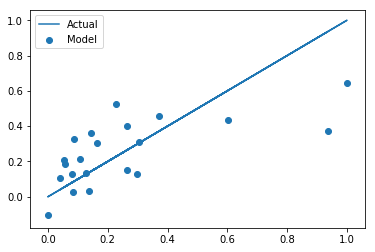

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
# your code here
pred=linreg.predict(X_train)
plt.scatter(y_train,pred,label='Model')
plt.plot(y_train,y_train,label='Actual')
plt.legend()

## Plot the test predictions against the actual data (y_hat_test vs. y_test)

Do the same thing for the test data.

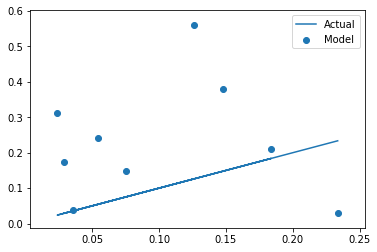

In [22]:
# your code here
test_pred=linreg.predict(X_test)
plt.scatter(y_test,test_pred,label='Model')
plt.plot(y_test,y_test,label='Actual')
plt.legend()

## Calculate the bias
Write a formula to calculate the bias of a models predictions given the actual data: $Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$   
(The expected value can simply be taken as the mean or average value.)  


In [23]:
import numpy as np
def bias(y, y_hat):
    return np.mean(y_hat-y)

## Calculate the variance
Write a formula to calculate the variance of a model's predictions: $Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [24]:
def variance(y_hat):
    return np.mean([i**2 for i in y_hat])-(np.mean(y_hat))**2

## Use your functions to calculate the bias and variance of your model. Do this seperately for the train and test sets.

In [31]:
# code for train set bias and variance
y_hat_train=pred
train_bias=bias(y_train,y_hat_train)
train_variance=variance(y_hat_train)
print(train_bias)
print(train_variance)

7.864079757761526e-17
0.03214383357586273


In [30]:
# code for test set bias and variance
y_hat_test=test_pred
test_bias=bias(y_test,y_hat_test)
test_variance=variance(y_hat_test)
print(test_bias)
print(test_variance)

0.1316090523144339
0.025067795412281532


## Describe in words what these numbers can tell you.

Your description here (this cell is formatted using markdown)

The model has bias because the testing bias and training bias are very different
The variance is similar for both test and train

## Overfit a new model by creating additional features by raising current features to various powers.

Use `PolynomialFeatures` with degree 3. 

**Important note:** By including this, you don't only take polynomials of single variables, but you also combine variables, eg:

$ \text{Budget} * \text{MetaScore} ^ 2 $

What you're essentially doing is taking interactions and creating polynomials at the same time! Have a look at how many columns we get using `np.shape`. Quite a few!


In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

## Plot your overfitted model's training predictions against the actual data

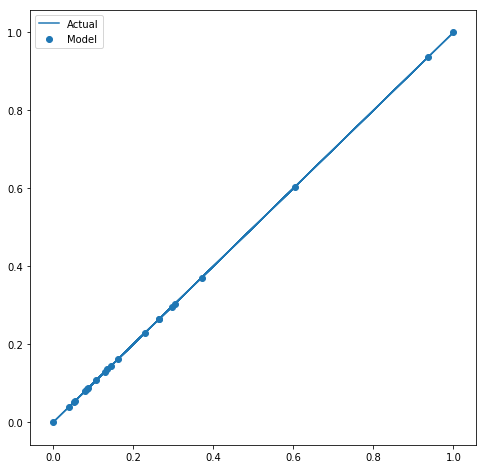

In [38]:
# your code here
linreg=LinearRegression()
linreg.fit(X_train_poly, y_train)
pred=linreg.predict(X_train_poly)
plt.figure(figsize=(8,8))
plt.scatter(y_train,pred,label='Model')
plt.plot(y_train,y_train,label='Actual')
plt.legend()

Wow, we almost get a perfect fit!

## Calculate the bias and variance for the train set

In [39]:
# your code here
print(bias(y_train,pred))
print(variance(pred))

4.100886297209172e-15
0.07193261283403289


## Plot your overfitted model's test predictions against the actual data.

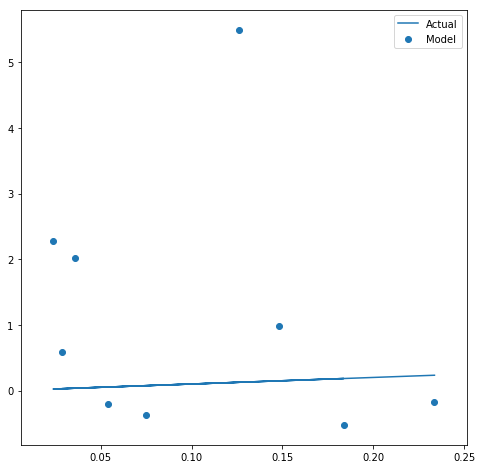

In [41]:
# your code here
test_pred=linreg.predict(X_test_poly)
plt.figure(figsize=(8,8))
plt.scatter(y_test,test_pred,label='Model')
plt.plot(y_test,y_test,label='Actual')
plt.legend()

##  Calculate the bias and variance for the train set.

In [42]:
# your code here
print(bias(y_test,test_pred))
print(variance(test_pred))

1.0223401019415705
3.315803389784615


## Describe what you notice about the bias and variance statistics for your overfit model

The bias and variance for the test set both increased drastically in the overfit model.

## Level Up - Optional

In this lab we went from 4 predictors to 35 by adding polynomials and interactions, using `PolynomialFeatures`. That being said, where 35 leads to overfitting, there are probably ways to improve by just adding a few polynomials. Feel free to experiment and see how bias and variance improve!

## Summary

This lab gave you insight in how bias and variance change for a training and test set by using a pretty "simple" model, and a very complex model. 